# Z traces
This is just to show how the z traces just lag behind the values, and show how leave the time constants to affect this time course.

First we load all the libraries

In [1]:
from __future__ import print_function
import subprocess
import sys 
sys.path.append('../')

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from mpl_toolkits.axes_grid1 import make_axes_locatable

from connectivity_functions import get_beta, get_w, softmax
from connectivity_functions import calculate_probability, calculate_coactivations
from data_transformer import transform_normal_to_neural_single
from data_transformer import transform_neural_to_normal_single
from network import BCPNN

np.set_printoptions(suppress=True)
sns.set(font_scale=2.0)

%matplotlib inline

Now we load the git version that was present at the time of running

In [2]:
run_old_version = True
if run_old_version:
    hash_when_file_was_written = '862d798aa105f5149550df7e11c28d5660a99e72'
    hash_at_the_moment = subprocess.check_output(["git", 'rev-parse', 'HEAD']).strip()
    print('Actual hash', hash_at_the_moment)
    print('Hash of the commit used to run the simulation', hash_when_file_was_written)
    subprocess.call(['git', 'checkout', hash_when_file_was_written])
    

Actual hash ed7eec13feeb4e674da0908fb4dfb7828b03b336
Hash of the commit used to run the simulation 862d798aa105f5149550df7e11c28d5660a99e72


## Set the traces

In [3]:
# As usual we load the patterns first
pattern1 = transform_normal_to_neural_single(np.array((1, 0, 0, 0, 0)))
pattern2 = transform_normal_to_neural_single(np.array((1, 0, 0, 0, 1)))
patterns = [pattern1, pattern2]

P = calculate_coactivations(patterns)
p = calculate_probability(patterns)

w = get_w(P, p)
beta = get_beta(p)

# Note that the first unit is going to be 1 regardless

In [4]:
# Now we load the network
tau_z_post = 1.0
tau_z_pre = 2.0

nn = BCPNN(beta, w, p_pre=p, p_post=p, p_co=P, tau_z_post=tau_z_post, tau_z_pre=tau_z_pre, M=2)

In [5]:
# Create the time course constants and run the network 
dt = 0.05
T = 5
time = np.arange(0, T + dt, dt)

history_o = np.zeros((time.size, beta.size))
history_s = np.zeros_like(history_o)
history_z_pre = np.zeros_like(history_o)
history_z_post = np.zeros_like(history_o)

for index_t, t in enumerate(time):
    nn.update_continuous(dt)
    history_o[index_t, :] = nn.o
    history_s[index_t, :] = nn.s
    history_z_pre[index_t, :] = nn.z_pre
    history_z_post[index_t, :] = nn.z_post
    
# Get and print final pattern
x = transform_neural_to_normal_single(nn.o)
print('final pattern', x)

final pattern [ 1.  0.  0.  0.  1.]


#### Plotting 

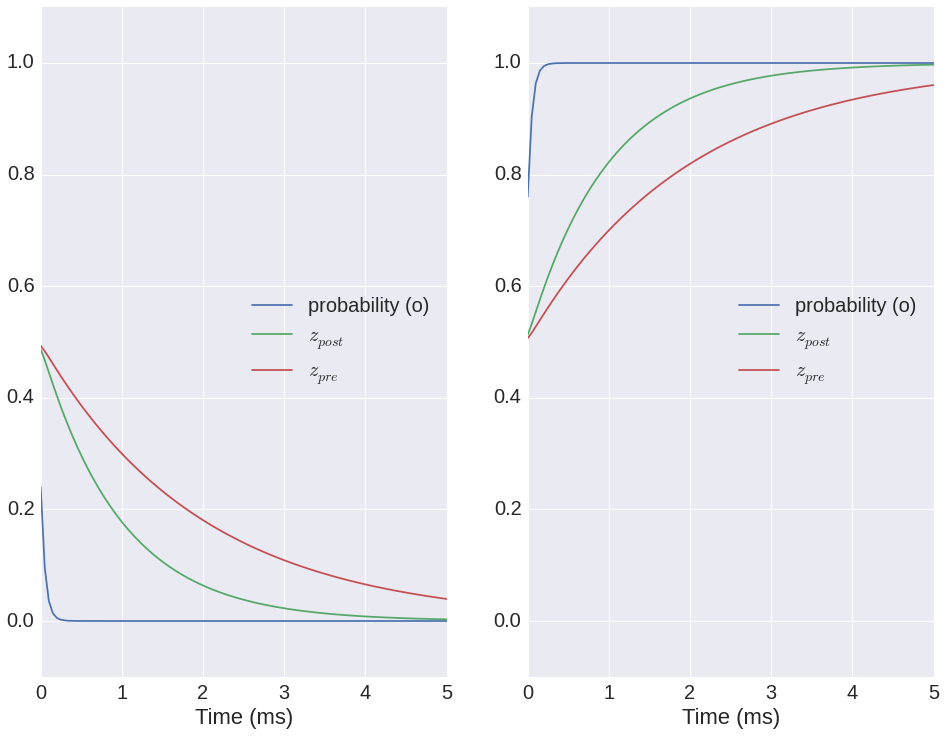

In [6]:

unit_to_plot = 0

# Plotting goes here
gs = gridspec.GridSpec(1, 2)
fig = plt.figure(figsize=(16, 12))

ax1 = fig.add_subplot(gs[0, unit_to_plot])
ax1.plot(time, history_o[:, unit_to_plot], label='probability (o)')
ax1.plot(time, history_z_post[:, unit_to_plot], label='$z_{post}$')
ax1.plot(time, history_z_pre[:, unit_to_plot], label='$z_{pre}$')

ax1.set_xlabel('Time (ms)')
ax1.set_ylim([-0.1, 1.1])
ax1.legend(loc='center right')

ax2 = fig.add_subplot(gs[0, 1])
ax2.plot(time, history_o[:, unit_to_plot + 1], label='probability (o)')
ax2.plot(time, history_z_post[:, unit_to_plot + 1], label='$z_{post}$')
ax2.plot(time, history_z_pre[:, unit_to_plot + 1], label='$z_{pre}$')

ax2.set_xlabel('Time (ms)')
ax2.set_ylim([-0.1, 1.1])
ax2.legend(loc='center right')

#### Returning to the original git 

Here we return to the old version

In [7]:
if run_old_version:
    subprocess.call(['git', 'checkout', 'master'])